In [1]:
''' 
TO USE: Run this block of code at the beginning; this lets the program know what packages to load in, essentially.
'''
# might need to run %matplotlib notebook or %matplotlib ipympl if below line doesn't work
%matplotlib widget 
from ipywidgets import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

interactive(children=(FloatSlider(value=0.0001, description='beta', max=1.0, step=0.0001), FloatSlider(value=0…

<function __main__.update(beta=0.0001, gamma=0.05, mu=0.005, dt=10, timespan=2000, initial_population=2000)>

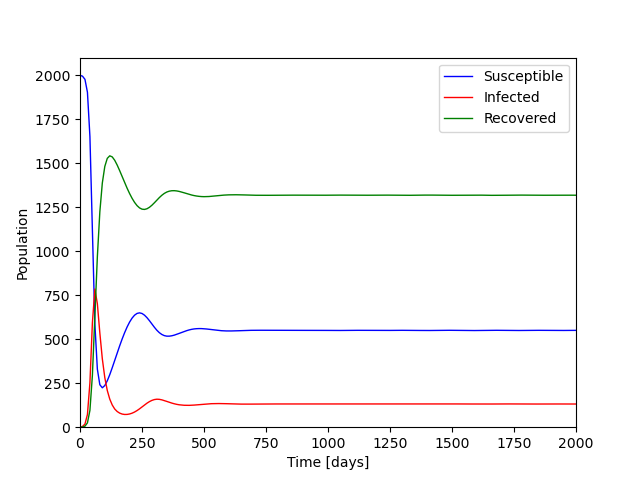

In [2]:
# let's make an interactive plot for our basic SIR model! 
'''
TO USE: 
Just run this block of code, and use the sliders to adjust the basic parameters for the open SIR model :)
 '''
# define the open population model
def open_SIR_model(t, p, beta, gamma, mu): # p = (S, I, R), N is total population size (S + I + R = N)
    S, I, R = p[0], p[1], p[2]
    N = S + I + R

    ''' This function returns the three differential equations that describe our open SIR model.
    '''
    return [mu * N - beta * S * I - mu * S, #dS/dt
            beta * S * I - gamma * I - mu * I, # dI/dt
            gamma * I - mu * R] # dR/dt

# now let's define our initial parameters 
dt = 10 # time step
mu = 0.005 # background mortality rate
beta = 0.0001 # transmission rate
gamma = 0.05 # recovery rate

total_pop = 2000 # total population
I_initial, R_initial = 1, 0
S_initial = total_pop - I_initial

# create timespan and solve the system of differential equations
t_range = np.arange(0, 2000 + 1, dt)
t_span = [t_range[0], t_range[-1]]

# solve_ivp is a tool for numerically solving a system of first-order ODEs (our difference equations)
solution = solve_ivp(open_SIR_model, t_span, [S_initial, I_initial, R_initial], args = (beta, gamma, mu), t_eval = t_range)

S, I, R = solution.y # get the solutions for each population group

# now make the plot :)
fig, ax = plt.subplots()

l1, = ax.plot(t_range, S, lw = 1, color = 'b', label = 'Susceptible')
l2, = ax.plot(t_range, I, lw = 1, color = 'r', label = 'Infected')
l3, = ax.plot(t_range, R, lw = 1, color = 'green', label = 'Recovered')

ax.set_xlabel('Time [days]')
ax.set_ylabel('Population')
# ax.set_title(f"N = {total_pop}, beta = {beta}, gamma = {gamma}, mu = {mu}")
ax.legend()

# the update function needs to rerun the simulation to determine the new S, I, R populations with each change
def update(beta = 0.0001, gamma = 0.05, mu = 0.005, dt = 10, timespan = 2000, initial_population = 2000):
    # allows for the use to change the the overall timescale and the time between each iteration
    t_range = np.arange(0, timespan + 1, dt)
    t_span = [t_range[0], t_range[-1]]


    # rerun the simulation
    p0 = [initial_population - 1, 1, 0] # array that describes the initial populations of each group [S(0), I(0), R(0)]
    sol = solve_ivp(open_SIR_model, t_span, p0, args = (beta, gamma, mu), t_eval = t_range)
    S, I, R = sol.y

    # update the curves for each population!
    l1.set_data(t_range, S)
    l2.set_data(t_range, I)
    l3.set_data(t_range, R)

    # update the x and y limits in the axis
    ax.set_xlim(0, timespan)
    ax.set_ylim(0, initial_population + 100)

    fig.canvas.draw_idle() # involved with drawing / updating

# allows for interactivity!
interact(update, beta = (0, 1, 0.0001), gamma = (0, 1, 0.01), mu = (0, 1, 0.001), dt = (0, 10, 1), timespan  =(0, 3000, 10))

interactive(children=(FloatSlider(value=0.0001, description='beta', max=0.001, step=1e-05), FloatSlider(value=…

<function __main__.update(beta=0.0001, gamma=0.05, sigma=0.001, mu=0.005, dt=10, timespan=2000, initial_population=2000)>

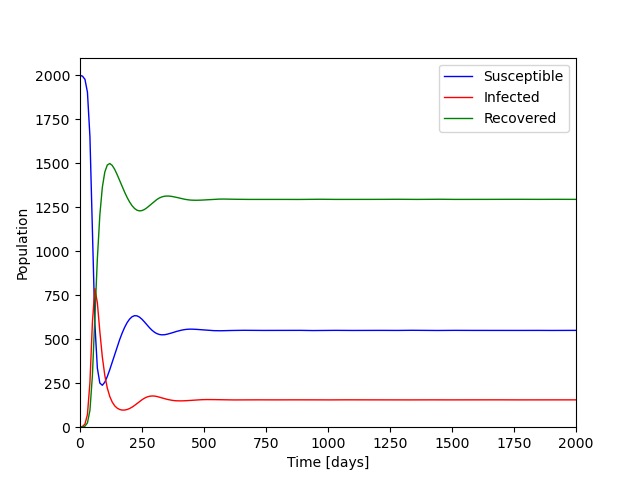

In [3]:
# implement interactive plot for an open SIR model with temporary immunity
def open_SIR_temp_immunity(t, p, beta, gamma, sigma, mu): # p = (S, I, R), N is total population size (S + I + R = N)
    S, I, R = p[0], p[1], p[2]
    N = S + I + R

    ''' This function returns the three differential equations that describe our open SIR model.
    '''
    return [mu * N - beta * S * I - mu * S + sigma*R,
            beta * S * I - gamma * I - mu * I,
            gamma * I - mu * R - sigma * R] 

# define initial parameters
dt = 10 # time step
mu = 0.001 # background mortality rate
beta = 0.0001 # transmission rate
gamma = 0.05 # recovery rate
sigma = 0.001 # total immunity duration of 20 days

total_pop = 2000 # total population
I_initial, R_initial = 1, 0
S_initial = total_pop - I_initial

# create timespan and solve the system of differential equations
t_range = np.arange(0, 2000 + 1, dt)
t_span = [t_range[0], t_range[-1]]

solution = solve_ivp(open_SIR_temp_immunity, t_span, [S_initial, I_initial, R_initial], args = (beta, gamma, sigma, mu), t_eval = t_range)

S, I, R = solution.y

# now make the plot :)
fig, ax = plt.subplots()

l1, = ax.plot(t_range, S, lw = 1, color = 'b', label = 'Susceptible')
l2, = ax.plot(t_range, I, lw = 1, color = 'r', label = 'Infected')
l3, = ax.plot(t_range, R, lw = 1, color = 'green', label = 'Recovered')

ax.set_xlabel('Time [days]')
ax.set_ylabel('Population')
# ax.set_title(f"N = {total_pop}, beta = {beta}, gamma = {gamma}, sigma = {sigma}, mu = {mu}")
ax.legend()

# the update function needs to rerun the simulation to determine the new S, I, R populations with each change
def update(beta = 0.0001, gamma = 0.05, sigma = 0.001, mu = 0.005, dt = 10, timespan = 2000, initial_population = 2000):
    # allows for the use to change the the overall timescale and the time between each iteration
    t_range = np.arange(0, timespan + 1, dt)
    t_span = [t_range[0], t_range[-1]]

    # rerun the simulation
    p0 = [initial_population - 1, 1, 0] # array that describes the initial populations of each group [S(0), I(0), R(0)]
    sol = solve_ivp(open_SIR_temp_immunity, t_span, p0, args = (beta, gamma, sigma, mu), t_eval = t_range)
    S, I, R = sol.y

    # update the curves for each population!
    l1.set_data(t_range, S)
    l2.set_data(t_range, I)
    l3.set_data(t_range, R)

    # # update the x and y limits in the axis
    ax.set_xlim(0, timespan)
    ax.set_ylim(0, initial_population + 100)

    print(f'Peak Infected {np.max(I)}')
    print(f'Endemic Infected {I[-1]}')
    
    fig.canvas.draw_idle() # involved with drawing / updating

# allows for interactivity :D
interact(update, beta = (0, 0.001, 0.00001), gamma = (0, 1, 0.01), sigma = (0, 1, 0.001), 
         mu = (0, 1, 0.001), dt = (1, 10, 1), timespan  = (0, 3000, 10))

interactive(children=(FloatSlider(value=0.0001, description='beta', max=0.001, step=1e-05), FloatSlider(value=…

<function __main__.update(beta=0.0001, gamma=0.05, delta=0.0001, mu=0.005, dt=10, timespan=2000, initial_population=2000)>

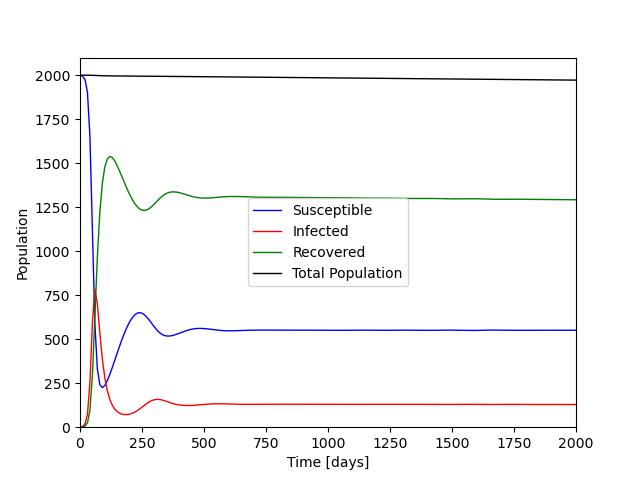

: 

In [ ]:
# let's make an interactive plot for our SIR model with a semi-fatal disease
# open SIR model with semi-fatal disease
def open_SIR_fatal(t, p, params): 
    # params is an array with the order [beta, gamma, delta, mu]; p = [S, I, R]
    S, I, R = p
    N = S + I + R
    beta, gamma, delta, mu = params

    return [mu * N - beta * S * I - mu * S, 
            beta * S * I - gamma * I - mu * I - delta * I, 
            gamma * I - mu * R] 

# define initial parameters
dt = 5 # time step
mu = 0.005 # background mortality rate
beta = 0.0001 # transmission rate
gamma = 0.05 # recovery rate
delta = 0.0001 # death rate from disease

total_pop = 2000 # total population
I_initial, R_initial = 1, 0
S_initial = total_pop - I_initial

# create timespan and solve the system of differential equations
t_range = np.arange(0, 2000 + 1, dt)
t_span = [t_range[0], t_range[-1]]

params = [beta, gamma, delta, mu]
p0 = [S_initial, I_initial, R_initial]
solution = solve_ivp(open_SIR_fatal, t_span, p0, args = (params,), t_eval = t_range)

S, I, R = solution.y
# plot the solution
fig, ax = plt.subplots()

l1, = ax.plot(t_range, S, lw = 1, color = 'b', label = 'Susceptible')
l2, = ax.plot(t_range, I, lw = 1, color = 'r', label = 'Infected')
l3, = ax.plot(t_range, R, lw = 1, color = 'green', label = 'Recovered')
l4, = ax.plot(t_range, S + I + R, lw = 1, c = 'k', label = 'Total Population')

ax.set_xlabel('Time [days]')
ax.set_ylabel('Population')
ax.legend()

# the update function needs to rerun the simulation to determine the new S, I, R populations with each change
def update(beta = 0.0001, gamma = 0.05, delta = 0.0001, mu = 0.005, dt = 10, timespan = 2000, initial_population = 2000):
    # allows for the use to change the the overall timescale and the time between each iteration
    t_range = np.arange(0, timespan + 1, dt)
    t_span = [t_range[0], t_range[-1]]

    # rerun the simulation
    p0 = [initial_population - 1, 1, 0] # array that describes the initial populations of each group [S(0), I(0), R(0)]
    params = np.array([beta, gamma, delta, mu])
    sol = solve_ivp(open_SIR_fatal, t_span, p0, args = (params,), t_eval = t_range)
    S, I, R = sol.y

    # update the curves for each population!
    l1.set_data(t_range, S)
    l2.set_data(t_range, I)
    l3.set_data(t_range, R)
    l4.set_data(t_range, S + I + R)

    # # update the x and y limits in the axis
    ax.set_xlim(0, timespan)
    ax.set_ylim(0, initial_population + 100)

    print(f'Peak Infected {np.max(I)}')
    print(f'Endemic Infected {I[-1]}')
    
    fig.canvas.draw_idle() # involved with drawing / updating

# allows for interactivity :D
interact(update, beta = (0, 0.001, 0.00001), gamma = (0, 1, 0.01), delta = (0, 1, 0.00001), 
         mu = (0, 1, 0.001), dt = (1, 10, 1), timespan  = (0, 3000, 10))

In [ ]:
'''
Feel free to copy and past the above cells, then modify them to create interactive plots for other SIR models not included here!
'''